<a href="https://colab.research.google.com/github/michael29-code/uapsc/blob/main/latihanuap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt #buat plot
from sympy import *

1. Diagonal Dominant

In [2]:
mX = [
        [
            [10, 2, -6],
            [-1, 4, 2],
            [2, 3, 6]
        ],
        [
            [-5, 2, -8],
            [4, -3, -9],
            [-8, -10, 9]
        ],
        [
            [10, -5, 3, 0],
            [3, -9, 2, -2],
            [-8, 0, 17, -4],
            [3, -3, -8, -15]
        ],
]

mY = [
    [17, -4, -12],
    [13, -7, -2],
    [9, 10, -10, -18]
]

In [3]:
def checkdiag(x):
  x = np.array(x)
  diag = np.diag(np.abs(x))
  sumwithdiag = np.sum(np.abs(x), axis = 1)
  sumwithoutdiag = sumwithdiag - diag

  if np.all(diag > sumwithoutdiag):
    return True
  else:
    return False 

In [4]:
for i, x in enumerate(mX):
  print(checkdiag(x))

True
False
True


seidel

In [5]:
def gausseidel (x,y,tolerance, max):
  x = np.array(x)
  y = np.array(y)

  if checkdiag(x) == False:
    return False;

  diag = np.diag(x)
  x = -x
  np.fill_diagonal(x,0)
  xbefore = np.zeros(x.shape[0])

  for i in range(max):
    xnew = np.array(xbefore)
    for j, row in enumerate(x):
      xnew[j] = (y[j] + np.dot(row,xnew))/diag[j]

    distance = np.sqrt(np.dot(xnew-xbefore,xnew-xbefore))

    if distance < tolerance:
      return xnew

    xbefore = xnew
  return False
    

In [6]:
for i , (x,y) in enumerate(zip(mX,mY)):
  print(gausseidel(x,y,0.01456,5))

[ 0.34010322  0.1875559  -2.20714569]
False
False


no 3 

In [7]:
lx = [1, 5, 7, 2, 3, 9, 10, 4, 6, 8]
ly = [34, 51, 80, 25, 90, 76, 100, 11, 45, 62]

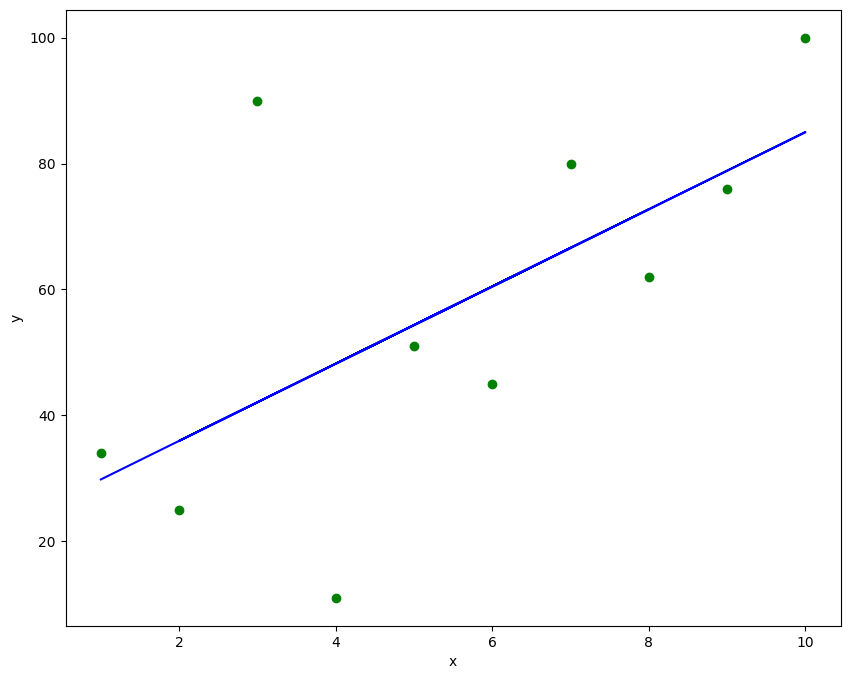

In [8]:
lx = np.array(lx)
ly = np.array(ly)

Y = np.vstack(ly)
A = np.vstack([lx,np.ones(len(lx))]).T

hasilinvers = np.linalg.inv(np.dot(A.T,A))

beta = np.dot(np.dot(hasilinvers,A.T),Y)

m = beta[0]
c = beta[1]

y = m*lx+c

fig = plt.figure(figsize=(10,8))
plt.xlabel("x")
plt.ylabel("y")

plt.plot(lx,ly,'go')
plt.plot(lx,y,'-b')

plt.show()

no 4

In [9]:
x = symbols('x')

f1 = lambda x: 7*x**4 - 3*x**2 + x
df1 = diff(f1(x),x)
df1 = lambdify(x,df1,'numpy')

f2 = lambda x: 8*x**6 + 5*x**4 - 2
df2 = diff(f2(x),x)
df2 = lambdify(x,df2,'numpy')

def newtonraphson(f,df,x0,tolerance, max):
  if max == 0:
    print('max iteration reached')
    return False
  if np.abs(f(x0)) < tolerance:
    print(x0)
    return True
  else:
    return newtonraphson(f,df,x0 - (f(x0)/df(x0)), tolerance, max-1)

newtonraphson(f1,df1,1,0.006541,5)
newtonraphson(f2,df2,1,0.006541,5)

max iteration reached
0.6903195287760319


True

no 5

In [10]:
fr = lambda x : 3*x**4-7*x**2 + 5

a = -4
b = 3
n = 30

x = np.linspace(a,b,n)

width = (b-a)/(n-1)

xleft = x[:-1]
yleft = fr(xleft)
leftriemann = width * (np.sum(np.abs(yleft)))

xright = x[1:]
yright = fr(xright)
rightriemann = width * (np.sum(np.abs(yright)))

xmid = (xleft + xright)/2
ymid = fr(xmid)
midRiemann = width * (np.sum(np.abs(ymid)))

ytrapezoid = fr(x)
trapezoid = (np.sum(np.abs(yleft)) + np.sum(np.abs(yright))) * width / 2

print(f"Left Riemann : {leftriemann}")
print(f"Right Riemann : {rightriemann}")
print(f"Mid Riemann : {midRiemann}")
print(f"Trapezoid : {trapezoid}")


Left Riemann : 645.1387652149571
Right Riemann : 530.2422134908192
Mid Riemann : 580.4556464297783
Trapezoid : 587.6904893528881
